<a href="https://colab.research.google.com/github/jayshivankar/K-Means-Clustering-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# visualize - https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/19Px-BTtZVXciTy5gybOyZsCGwPqKL-5F/view?usp=sharing

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Cust_Spend_Data.csv')
data.shape

(10, 7)

In [ ]:
# data sample
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [ ]:
# data with and without PII (Personally Identifiable Information)
pdata = data.iloc[:, 2:]
idata = data.iloc[:, :2]

In [ ]:
# data scaling
scale = StandardScaler()
scaled_data = scale.fit_transform(pdata)

# data after scaling
scaled_df = pd.DataFrame(scaled_data, columns=scale.get_feature_names_out())
scaled_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [ ]:
# Algo with random cluster
r_kmeans = KMeans(n_clusters=5, init='random', n_init='auto', random_state=42)
rkmeans = r_kmeans.fit_predict(scaled_df)
rkmeans += 1        # start cluster from 1 instead of 0

# dataframe for the predicted centroids
r_cluster = pd.DataFrame(rkmeans)
r_cluster

# concat the cluster with the raw data
pdata['r_cluster'] = r_cluster

# data sample
pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,4
2,7000,7,1,3,4,5
3,6500,5,1,1,4,5
4,6000,6,0,12,3,3
5,4000,3,0,1,8,4
6,2500,5,0,11,2,3
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [ ]:
# optimum number of cluster

wcss = []

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

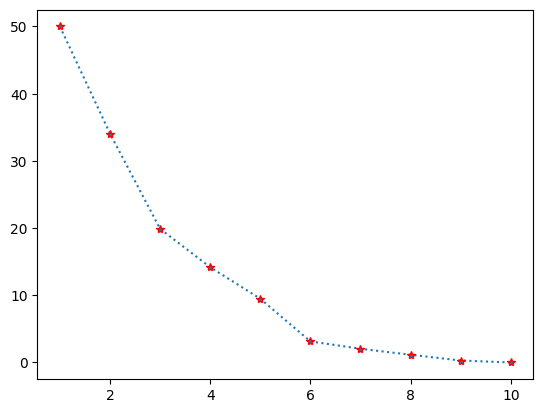

In [ ]:
# Elbow plot (WCSS plot)
plt.plot(range(1, 11), wcss, ls=':',marker='*', markeredgecolor='red')
plt.show()

In [ ]:
# final model with optimum clusters
optimum_kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=42)
okmeans = optimum_kmeans.fit_predict(scaled_data)
okmeans += 1

# dataframe for the predicted centroids
optimum_cluster = pd.DataFrame(okmeans)

# concat the cluster with the raw data
pdata['o_cluster'] = optimum_cluster

# data sample
pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,r_cluster,o_cluster
0,10000,2,1,1,0,1,1
1,7000,3,0,10,9,4,3
2,7000,7,1,3,4,5,1
3,6500,5,1,1,4,5,1
4,6000,6,0,12,3,3,3
5,4000,3,0,1,8,4,2
6,2500,5,0,11,2,3,3
7,2500,3,0,1,1,2,2
8,2000,2,0,2,2,2,2
9,1000,4,0,1,7,2,2


In [ ]:
# retaining the data with final clusters
pdata.drop('r_cluster', axis=1, inplace=True)

# data sample
pdata

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,o_cluster
0,10000,2,1,1,0,1
1,7000,3,0,10,9,3
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,3
5,4000,3,0,1,8,2
6,2500,5,0,11,2,3
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [ ]:
# mean value of each data columns based on clusters
cluster_mean = pd.DataFrame(round(pdata.groupby('o_cluster').mean(), 1))
cluster_mean_sorted = cluster_mean.sort_values(by='Avg_Mthly_Spend', ascending=False)
cluster_mean_sorted

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
o_cluster,,,,,
1,7833.3,4.7,1.0,1.7,2.7
3,5166.7,4.7,0.0,11.0,4.7
2,2375.0,3.0,0.0,1.2,4.5


In [ ]:
# cluster mapping
cluster_map = {1: 'Gold', 2: 'Bronze', 3: 'Silver'}

# mapping the columns to dataframe
pdata['cust_class'] = pdata['o_cluster'].map(cluster_map)

# appending the PII data
cust_class_df = pd.concat([idata, pdata], axis=1)
cust_class_df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,o_cluster,cust_class
0,1,A,10000,2,1,1,0,1,Gold
1,2,B,7000,3,0,10,9,3,Silver
2,3,C,7000,7,1,3,4,1,Gold
3,4,D,6500,5,1,1,4,1,Gold
4,5,E,6000,6,0,12,3,3,Silver
5,6,F,4000,3,0,1,8,2,Bronze
6,7,G,2500,5,0,11,2,3,Silver
7,8,H,2500,3,0,1,1,2,Bronze
8,9,I,2000,2,0,2,2,2,Bronze
9,10,J,1000,4,0,1,7,2,Bronze


# PREDICTION FOR THE INCOMING NEW DATA

In [ ]:
# cluster prediction of new data - single row

# input data
new_data = {'Avg_Mthly_Spend': 9000,
            'No_Of_Visits': 5,
            'Apparel_Items': 2,
            'FnV_Items': 7,
            'Staples_Items': 6}

# creating a data frame for the input
new_df = pd.DataFrame([new_data])

# prepare the data for ML model
# scale the data
new_data_scaled = scale.transform(new_df)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_df.columns)

# model prediction
data_pred = optimum_kmeans.predict(new_data_scaled)
data_pred += 1

# customer - cluster
if data_pred[0] == 1:
    print('The customer belongs to gold class.')
elif data_pred[0] == 2:
    print('The customer belongs to Bronze class.')
else:
    print('The customer belongs to silver class.')

The customer belongs to gold class.


In [ ]:
# cluster prediction of new data - multiple row

# input data
new_multi_data = {'Avg_Mthly_Spend': [2000, 6000, 3000],
                'No_Of_Visits': [5, 6, 1],
                'Apparel_Items': [1, 0, 1],
                'FnV_Items': [7, 1, 4],
                'Staples_Items': [6, 0, 1]}

# creating a data frame for the input
new_multi_df = pd.DataFrame(new_multi_data)

# prepare the data for ML model
# scale the data
n_data_scaled = scale.transform(new_multi_df)
n_data_scaled = pd.DataFrame(n_data_scaled, columns=new_multi_df.columns)

# model prediction
n_data_pred = optimum_kmeans.predict(n_data_scaled)
n_data_pred += 1
new_multi_df['o_cluster'] = n_data_pred

# mapping
new_multi_df['o_cluster'] = new_multi_df['o_cluster'].map({1: 'Gold', 2: 'Bronze', 3: 'Silver'})
new_multi_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,o_cluster
0,2000,5,1,7,6,Silver
1,6000,6,0,1,0,Gold
2,3000,1,1,4,1,Bronze
